In [1]:
#load tweepy library 
import tweepy
import json
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Seting display width limit to -1 full length
pd.set_option('display.max_colwidth', -1)

In [3]:
# Load Data
ta = pd.read_csv('twitter-archive-enhanced.csv')

# Data Gathering Part

In [4]:
# Get image Predictions data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

ip = pd.read_csv('image-predictions.tsv', sep='\t')

ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# Setting up the tweepy API

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
# api = tweepy.API(auth)

In [6]:
# getting familer with tweepy api
# getting the limit status 
api.rate_limit_status()['resources'].keys()
api.rate_limit_status()['resources']['statuses']

{'/statuses/retweeters/ids': {'limit': 75,
  'remaining': 75,
  'reset': 1556051469},
 '/statuses/retweets_of_me': {'limit': 75,
  'remaining': 75,
  'reset': 1556051469},
 '/statuses/home_timeline': {'limit': 15,
  'remaining': 15,
  'reset': 1556051469},
 '/statuses/show/:id': {'limit': 900, 'remaining': 900, 'reset': 1556051469},
 '/statuses/user_timeline': {'limit': 900,
  'remaining': 900,
  'reset': 1556051469},
 '/statuses/friends': {'limit': 15, 'remaining': 15, 'reset': 1556051469},
 '/statuses/retweets/:id': {'limit': 75, 'remaining': 75, 'reset': 1556051469},
 '/statuses/mentions_timeline': {'limit': 75,
  'remaining': 75,
  'reset': 1556051469},
 '/statuses/oembed': {'limit': 180, 'remaining': 180, 'reset': 1556051469},
 '/statuses/lookup': {'limit': 900, 'remaining': 900, 'reset': 1556051469}}

In [7]:
# Get the WeRateDogs user details
user = api.get_user('dog_rates')

user

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs™',
 'screen_name': 'dog_rates',
 'location': '「 DM YOUR DOGS 」',
 'profile_location': None,
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com',
 'url': 'https://t.co/N7sNNHSfPq',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHSfPq',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 7980912,
 'friends_count': 12,
 'listed_count': 6144,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 141676,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 10065,
 'lang': 'en',
 'status': {'created_at': 'Tue Apr 23 03:43:49 +0000 2019',
  'id': 1120533709512425473,
  'id_str': '1120533709512425473',
  'text': '@KrissiAmiet 😂😂😂',
  'truncated': Fals

In [8]:
# testing the statuses_lookup 
tweet = api.statuses_lookup(['1115284254672412672'])
# Converting json to dict and accessing it data
tweet = dict(tweet[0])
tweet.keys()
tweet['retweet_count']
tweet['favorite_count']

23376

In [9]:
# function to take 2 parameters api, and list of tweets

def tweets_fun (tweet_ids, api):
    full_tweets = []
    tweet_count = len(tweet_ids)
    #print(tweet_count)
    #print(range(int(tweet_count / 100) + 1))
    try:
        for i in range(int(tweet_count / 100) + 1):
            #print(i)
            # Catch the last group if it is less than 100 tweets
            end_loc = min((i + 1) * 100, tweet_count)
            full_tweets.extend(
                api.statuses_lookup(id_=tweet_ids[i * 100:end_loc]))
        return full_tweets
    except tweepy.TweepError:
        print(TweepError.response.error)
        print('Something went wrong, quitting...')
        

In [10]:
# Call function tweets_fun to get statuses for all of the tweet_ids in enhanced tweets archive
results = tweets_fun(list(ta.tweet_id), api)

In [11]:
# Converting queried_tweets to a dataframe
results_df = pd.DataFrame(results)
# Store Results in file to avoid re-calling APIs
results_df.to_csv('queried_tweets_using_tweepy.csv')

In [12]:
# list of all tweeted queries ids
alist =[]
for i in range(len(results)):
    alist.append(results[i]['id'])

len(alist)

2337

In [13]:
# isolating the non found ids
not_found_ids = set(list(ta.tweet_id)) - set(alist)

not_found_ids = list(not_found_ids)

In [14]:
# Trying to query for the not_found_ids to double check
# response_ = []
# for i in range(len(list(not_found_ids))):
#     response_.extend(api.get_status(not_found_ids[i]))

#TweepError: [{'code': 144, 'message': 'No status found with that ID.'}]

In [15]:
queried_tweets = pd.read_csv('queried_tweets_using_tweepy.csv')

In [16]:
queried_tweets = queried_tweets[['id','favorite_count','retweet_count']]

In [17]:
queried_tweets.head()

,id,favorite_count,retweet_count
0,876484053909872640,18276,2324
1,886366144734445568,20610,3094
2,877611172832227328,0,78
3,888078434458587136,21162,3367
4,891689557279858688,40937,8363


# Data Assesment Part

#### Twitter Archive Dataset

In [18]:
ta.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [19]:
# Duplicate Check
sum(ta.duplicated())

0

In [20]:
# Getting merged Dataframe info
ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
# Megrged Datafarme Column names
ta.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [22]:
# Source Series unique values
ta.sample(20).source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [23]:
# Checking the name Series quality
ta[ta.name != 'NaN'].loc[:,['tweet_id','text','name']]

,tweet_id,text,name
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin
5,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,Jax
7,890729181411237888,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None
8,890609185150312448,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,Zoey
9,890240255349198849,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie


In [24]:
ta.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [25]:
ta[ta.rating_numerator <= 10].loc[:,['tweet_id','text','rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
113,870726314365509632,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,10,10
165,860177593139703809,RT @dog_rates: Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.c…,10,10
212,851861385021730816,RT @eddie_coe98: Thanks @dog_rates completed my laptop. 10/10 would buy again https://t.co/bO0rThDlXI,10,10
229,848212111729840128,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10
232,847962785489326080,This is Georgie. He's very shy. Only puppears when called. Aggressively average at fetch. Unique front paws. Looks slippery. 10/10 would pet https://t.co/rcDs5LkiSj,10,10
274,840698636975636481,@0_kelvin_0 &gt;10/10 is reserved for puppos sorry Kevin,10,10
275,840696689258311684,I didn't even have to intervene. Took him 4 minutes to realize his error. 10/10 for Kevin https://t.co/2gclc1MNr7,10,10
281,839290600511926273,RT @alexmartindawg: THE DRINK IS DR. PUPPER 10/10 good pun @matt___nelson @GoodDogsGame https://t.co/act3duiqbL,10,10
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10


In [26]:
ta.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [27]:
ta[ta.rating_denominator < 10].loc[:,['tweet_id','text','rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


In [28]:
# Checking the Expmanded_urls Series
ta.expanded_urls.sample(20)

1843    https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/675853064436391936/photo/1                                                                                                                                
1244    https://twitter.com/dog_rates/status/711743778164514816/photo/1                                                                                                                                                                                                
125     https://twitter.com/dog_rates/status/868622495443632128/photo/1                                                                                                                                                                                                
1665    https://twitter.com/dog_rates/status/682750546109968385/photo/1                                                                                                                                         

In [29]:
# Checking the Exapnaded_urls Series when its null (mostly nulls means Retweet)
ta[pd.isna(ta.expanded_urls) == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [30]:
# Value_counts of several ta series

ta.name.value_counts()

ta.expanded_urls.value_counts()

ta.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

#### Image Predictions Dataset

In [31]:
# info about image predictions and null values check
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
# Duplication check
sum(ip.duplicated())

0

In [33]:
ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [34]:
# ip dataset assesment and duplicate check 
unique_jpg_url = list(ip.jpg_url.unique())
len(unique_jpg_url)
ip[ip.jpg_url.duplicated(keep=False) == True].sort_values('jpg_url')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [35]:
unique_jpg_url_id = ip[ip.jpg_url.isin(unique_jpg_url)].tweet_id
ip[~ip.tweet_id.isin(unique_jpg_url_id)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [36]:
len(ip.p1.unique())
len(ip.p2.unique())
len(ip.p3.unique())

408

# Data Cleaning

In [37]:
# Copy all the datasets before cleaning
ta_clean = ta.copy()
queried_tweets_clean = queried_tweets.copy()
ip_clean = ip.copy()

### Tidiness:

*1. Joing queried tweets to the orginal dataset*

##### Define

*Join enchanced twitter archive with queried tweets info*

##### Code

In [38]:
#merging queried tweets from twitter with our loacal dataset, and droping id merged column
ta_clean = ta_clean.merge(queried_tweets_clean, how='left', left_on='tweet_id',right_on='id').drop('id',axis = 1)

##### Test

In [39]:
ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_count                23

*2. dog stages should be one column instead of 4*

##### Define

*Melting Dog stages from wide to long format or drop the columns and reextract them correctly from text*

##### Code

In [40]:
ta_clean.sample(10)
ta_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorite_count', 'retweet_count'],
      dtype='object')

In [41]:
# Since we have the source we can extract it and store it correctly
ta_clean.columns

ta_clean['stage'] = ta_clean.text.str.extract('(doggo|floofer|pupper|puppo)')

# Drop the old wide formated columns
ta_clean.drop(['doggo', 'puppo', 'pupper', 'floofer'], axis=1,inplace=True)

#### Test

In [42]:
ta_clean.stage.unique()
ta_clean.columns
ta_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,stage
2214,668544745690562560,NaN,NaN,2015-11-22 21:41:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",It is an honor to rate this pup. He is a Snorklhuahua from Amarillo. A true renaissance dog. Also part Rudolph 10/10 https://t.co/ALNyYuGui7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668544745690562560/photo/1,10,10,None,515.0,230.0,NaN
2046,671520732782923777,NaN,NaN,2015-12-01 02:46:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Alejandro. He's an extremely seductive pup. 10/10 https://t.co/C7dPcCUNpF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671520732782923777/photo/1,10,10,Alejandro,1405.0,533.0,NaN
1456,695314793360662529,NaN,NaN,2016-02-04 18:35:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Colin. He really likes green beans. It's tearing his family apart. 10/10 please pray for Colin https://t.co/ioFy0cmK03,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/695314793360662529/photo/1,https://twitter.com/dog_rates/status/695314793360662529/photo/1,https://twitter.com/dog_rates/status/695314793360662529/photo/1,https://twitter.com/dog_rates/status/695314793360662529/photo/1",10,10,Colin,3772.0,1540.0,NaN
269,841320156043304961,NaN,NaN,2017-03-13 16:08:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","We don't rate penguins, but if we did, this one would get 12/10 https://t.co/cEORXhwZ5K",NaN,NaN,NaN,https://twitter.com/abc/status/841311395547250688,12,10,None,20441.0,5735.0,NaN
2321,666435652385423360,NaN,NaN,2015-11-17 02:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Can you behave? You're ruining my wedding day""\nDOG: idgaf this flashlight tastes good as hell\n\n10/10 https://t.co/GlFZPzqcEU",NaN,NaN,NaN,https://twitter.com/dog_rates/status/666435652385423360/photo/1,10,10,None,163.0,53.0,NaN
261,842846295480000512,NaN,NaN,2017-03-17 21:13:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He's wishing you a very fun and safe St. Pawtrick's Day. 13/10 festive af https://t.co/nFpNgCWWYs,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842846295480000512/photo/1,13,10,Charlie,15706.0,3789.0,NaN
1357,703407252292673536,NaN,NaN,2016-02-27 02:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper doesn't understand gates. 10/10 so close https://t.co/GUbFF4o6dZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703407252292673536/photo/1,10,10,None,2540.0,730.0,pupper
581,800443802682937345,NaN,NaN,2016-11-20 21:00:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Sampson. He's about to get hit with a vicious draw 2. Has no idea. 11/10 poor pupper https://t.co/FYT9QBEnKG,7.761133e+17,4.196984e+09,2016-09-14 17:40:06 +0000,"https://twitter.com/dog_rates/status/776113305656188928/photo/1,https://twitter.com/dog_rates/status/776113305656188928/photo/1",11,10,Sampson,0.0,4677.0,pupper
1939,673887867907739649,NaN,NaN,2015-12-07 15:32:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're having a great time sleeping and your mom comes in and turns on the lights. 10/10 https://t.co/6qYd6BNSPd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/673887867907739649/photo/1,https://twitter.com/dog_rates/status/673887867907739649/photo/1",10,10,None,940.0,256.0,NaN
1057,742150209887731712,NaN,NaN,2016-06-13 00:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twit

*3. rating should be in one column instead of 2*

##### Define

*Join the 2 columns using str.cat pandas function*

##### Code

In [43]:
# Change the datatype of the rating_numerator rating_denominator
ta_clean.rating_numerator = ta_clean.rating_numerator.astype(str)
ta_clean.rating_denominator = ta_clean.rating_denominator.astype(str)

ta_clean['rating'] = ta_clean.rating_numerator.str.cat(ta_clean.rating_denominator, sep = '/')

# Drop the original ratings columns
ta_clean.drop(['rating_denominator','rating_numerator'], axis=1,inplace=True)

##### Test

In [44]:
ta_clean.rating
ta_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'favorite_count',
       'retweet_count', 'stage', 'rating'],
      dtype='object')

*4. Merge ip dataframe with the other 2 dataframes*

##### Define

*Merge ip_clean with ta_clean in order to achive tidy dataframe*

##### Code

In [45]:
ta_clean = ta_clean.merge(ip_clean, left_on='tweet_id', right_on='tweet_id', how='left')

##### Test

In [46]:
ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
name                          2356 non-null object
favorite_count                2337 non-null float64
retweet_count                 2337 non-null float64
stage                         399 non-null object
rating                        2356 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                          

### Quality

*1. drop retweets columns and rows.*

##### Define

*Retweets are not needed as per the project details, so I will identify them then remove them from the Dataset*

##### Code

In [47]:
# Remove Retweets 
ta_clean = ta_clean[ta_clean.text.str.contains('RT') == False]

# Drop all retweets related info
ta_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis= 1,inplace=True)

##### Test

In [48]:
ta_clean.info()

# Testing if there are any lef with RT in text
ta_clean[ta_clean.text.str.contains('RT') == True]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id                 2164 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2164 non-null object
source                   2164 non-null object
text                     2164 non-null object
expanded_urls            2106 non-null object
name                     2164 non-null object
favorite_count           2160 non-null float64
retweet_count            2160 non-null float64
stage                    362 non-null object
rating                   2164 non-null object
jpg_url                  1986 non-null object
img_num                  1986 non-null float64
p1                       1986 non-null object
p1_conf                  1986 non-null float64
p1_dog                   1986 non-null object
p2                       1986 non-null object
p2_conf                  1986 non-null float64
p2_dog            

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


*2. source column needs clean up as the 2 unique values are iphone and vine.*

##### Define

*Replace Sources URL with Source name*

##### Code

In [49]:
ta_clean.source.value_counts()
ta_clean['source2'] = ta_clean.source.str.extract(r'>(.*?)<')
ta_clean.drop('source', axis=1, inplace=True)
ta_clean.rename({'source2': 'source'},axis=1,inplace=True)
ta_clean.reset_index(drop=True,inplace=True)

##### Test

In [50]:
ta_clean.source.value_counts()

Twitter for iPhone     2034
Vine - Make a Scene    88  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

*3. there are some missing names ( in valid names a,an, the, None, such, quite etc)*

##### Define

*Better regexp to extarct the names, compare it with the orginal one*

##### Code

In [51]:
ta_clean.reset_index(drop=True,inplace=True)
# Better regexp to extract the names

reg = r"(\b[A-Z]'{0,1}[A-zÀ-ÖØ-öø-ÿ]+?\.{0,1}\b)"
equals = ta_clean.name.str.extract(reg).eq(ta_clean.name, axis=0)
index_equals = equals[equals[0] == False].index

ta_clean.iloc[index_equals]
# merged.name.str.extract(reg).iloc[index_equals]
pd.merge(ta_clean, ta_clean.name.str.extract(reg), left_index=True, right_index=True)[['tweet_id','text','name',0]].iloc[index_equals]

# Still some names needs to be fixed manually and None needs o be set to NaN

,tweet_id,text,name,0
21,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such,NaN
53,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a,NaN
146,859196978902773760,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite,NaN
166,855459453768019968,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite,NaN
281,832645525019123713,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,not,NaN
309,828650029636317184,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one,NaN
449,806219024703037440,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly,NaN
523,792913359805018113,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a,NaN
624,776201521193218049,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,O,NaN
646,772581559778025472,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a,NaN


In [52]:
# index 623 O'Malley needs a correction
ta_clean.name.iloc[624] = "O'Malley"

In [53]:
new_test = pd.merge(ta_clean, ta_clean.name.str.extract(reg), left_index=True, right_index=True)


In [54]:
new_test.drop(['name'],axis=1,inplace=True)

In [55]:
new_test.rename({0:'name'}, axis=1,inplace=True)

In [56]:
new_test.name = new_test.name.replace('None',np.nan)

In [57]:
ta_clean = new_test.copy()

##### Test

In [58]:
ta_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,favorite_count,retweet_count,stage,rating,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,source,name
325,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,5353.0,270.0,NaN,7/10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,NaN
123,864873206498414592,NaN,NaN,2017-05-17 16:00:15 +0000,We only rate dogs. Please don't send in Jesus. We're trying to remain professional and legitimate. Thank you... 14/10 https://t.co/wr3xsjeCIR,"https://twitter.com/dog_rates/status/864873206498414592/photo/1,https://twitter.com/dog_rates/status/864873206498414592/photo/1",31939.0,8669.0,NaN,14/10,...,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False,Twitter for iPhone,NaN
1141,705975130514706432,NaN,NaN,2016-03-05 04:36:02 +0000,This is Adele. Her tongue flies out of her mouth at random. It's a debilitating illness. 10/10 stay strong pupper https://t.co/cfn81n3FLO,"https://twitter.com/dog_rates/status/705975130514706432/photo/1,https://twitter.com/dog_rates/status/705975130514706432/photo/1",3214.0,770.0,pupper,10/10,...,0.587764,True,American_Staffordshire_terrier,0.281429,True,bull_mastiff,0.094798,True,Twitter for iPhone,Adele
771,752568224206688256,NaN,NaN,2016-07-11 18:20:21 +0000,Here are three doggos completely misjudging an airborne stick. Decent efforts tho. All 9/10 https://t.co/HCXQL4fGVZ,https://vine.co/v/5W0bdhEUUVT,5762.0,2427.0,doggo,9/10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vine - Make a Scene,NaN
618,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,11827.0,3167.0,NaN,12/10,...,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True,Twitter for iPhone,NaN
215,844973813909606400,NaN,NaN,2017-03-23 18:07:10 +0000,"This is Brady. He's a recovering alcoholic. Demonstrating incredible restraint here. 12/10 don't give pup, don't give in, Brady https://t.co/B1iBuSq3hr",https://twitter.com/dog_rates/status/844973813909606400/photo/1,15553.0,3369.0,NaN,12/10,...,0.742421,True,golden_retriever,0.195218,True,Chihuahua,0.017320,True,Twitter for iPhone,Brady
1455,684122891630342144,NaN,NaN,2016-01-04 21:23:02 +0000,Heartwarming scene of two pups that want nothing more than to be together. Touching af. Great tongue. Both 11/10 https://t.co/k32mSlRx0j,https://twitter.com/dog_rates/status/684122891630342144/photo/1,2071.0,499.0,NaN,11/10,...,0.822193,False,Arabian_camel,0.046976,False,jaguar,0.025785,False,Twitter for iPhone,NaN
966,726828223124897792,NaN,NaN,2016-05-01 17:38:46 +0000,This is Bloop. He's a Phoenician Winnebago. Tongue is just wow. That box is all he has (tragic). 12/10 would caress https://t.co/DWNrPPXgHA,https://twitter.com/dog_rates/status/726828223124897792/photo/1,3672.0,1045.0,NaN,12/10,...,0.255327,True,Border_terrier,0.181279,True,Labrador_retriever,0.125185,True,Twitter for iPhone,Bloop
1262,696405997980676096,NaN,NaN,2016-02-07 18:51:43 +0000,This is Berb. He just found out that they have made 31 Kidz Bop CD's. Downright terrifying. 7/10 hang in there Berb https://t.co/CIFLjiTFwZ,https://twitter.com/dog_rates/status/696405997980676096/photo/1,3334.0,1203.0,NaN,7/10,...,0.132845,True,Walker_hound,0.086005,True,Great_Pyrenees,0.065582,True,Twitter for iPhone,Berb
137,861288531465048066,NaN,NaN,2017-05-07 18:36:02 +0000,HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SAY. IT'S. H*CKIN. RIDICULOUS. THAT. DOGS. CAN'T VOTE. ABSOLUTE. CODSWALLUP. THANK. YOU. 13/10 https://t.co/SqKJPwbQ2g,https://twitter.com/dog_rates/status/861288531465048066/video/1,17086.0,4164.0,NaN,13/10,...,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True,Twitter for iPhone,NaN


In [59]:
ta_clean.name.iloc[624]

"O'Malley"

In [60]:
ta_clean.name.value_counts()

Lucy        11
Charlie     11
Oliver      10
Cooper      10
Penny       9 
Tucker      9 
Lola        8 
Winston     8 
Daisy       7 
Sadie       7 
Toby        7 
Bo          6 
Stanley     6 
Oscar       6 
Bailey      6 
Bella       6 
Jax         6 
Koda        6 
Leo         5 
Scout       5 
Dave        5 
Milo        5 
Rusty       5 
Buddy       5 
Chester     5 
Louis       5 
Bentley     5 
George      4 
Duke        4 
Oakley      4 
           .. 
Beya        1 
Kona        1 
Chuck       1 
Scott       1 
Anna        1 
Berb        1 
Ester       1 
Jareld      1 
Dixie       1 
Tito        1 
Kellogg     1 
Amber       1 
Dutch       1 
Obie        1 
Harrison    1 
Livvie      1 
Wiggles     1 
Aja         1 
Goliath     1 
Darla       1 
Carly       1 
Pepper      1 
Mitch       1 
Sailor      1 
Moreton     1 
Pablo       1 
Jett        1 
General     1 
Reptar      1 
Arlo        1 
Name: name, Length: 927, dtype: int64

In [61]:
ta_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,favorite_count,retweet_count,stage,rating,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,source,name
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,37619.0,8199.0,NaN,13/10,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,Twitter for iPhone,Phineas
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,32325.0,6065.0,NaN,13/10,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Twitter for iPhone,Tilly
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,24354.0,4011.0,NaN,12/10,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Twitter for iPhone,Archie
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,40937.0,8363.0,NaN,13/10,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Twitter for iPhone,Darla
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",39144.0,9054.0,NaN,12/10,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Twitter for iPhone,Franklin
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,19681.0,3007.0,NaN,13/10,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Twitter for iPhone,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",11508.0,1987.0,NaN,13/10,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,Twitter for iPhone,Jax
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",63461.0,18220.0,NaN,13/10,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,Twitter for iPhone,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,27068.0,4125.0,NaN,13/10,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,Twitter for iPhone,Zoey
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying international doggo communication and stick t

*4.timestamp datatype.*

##### Define

*use to_datetime pandas function*

##### Code

In [62]:
ta_clean.timestamp = pd.to_datetime(ta_clean.timestamp)

##### Test

In [63]:
type(ta_clean.timestamp[1])

pandas._libs.tslibs.timestamps.Timestamp

*5. fix tweet_id 883482846933004288 numerator.*

##### Define

*Check first and compare with text to make sure its a msitake then fix*

##### Code

In [64]:
ta_clean[ta_clean.tweet_id == 883482846933004288].rating

ta_clean.rating.iloc[42] = '13.5/10'

##### Test

In [65]:
ta_clean[ta_clean.tweet_id == 883482846933004288].rating

42    13.5/10
Name: rating, dtype: object

*6. tweet_id 666287406224695296 and 835246439529840640 has wrong numerator and denominator.*

##### Define

*Locate the tweets then double check and compare with text and manually fixing it*

##### Code

In [66]:
ta_clean[ta_clean.tweet_id.isin([666287406224695296])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,favorite_count,retweet_count,stage,rating,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,source,name
2143,666287406224695296,NaN,NaN,2015-11-16 16:11:11+00:00,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,142.0,63.0,NaN,1/2,...,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,Twitter for iPhone,NaN


In [67]:
ta_clean.rating.iloc[2143] = '9/10'

In [68]:
ta_clean[ta_clean.tweet_id.isin([835246439529840640])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,favorite_count,retweet_count,stage,rating,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,source,name
262,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03+00:00,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,2176.0,77.0,NaN,960/0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,NaN


In [69]:
ta_clean.rating.iloc[262] = '13/10'

##### Test

In [70]:
ta_clean[ta_clean.tweet_id.isin([835246439529840640,666287406224695296])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,favorite_count,retweet_count,stage,rating,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,source,name
262,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03+00:00,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,2176.0,77.0,NaN,13/10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,NaN
2143,666287406224695296,NaN,NaN,2015-11-16 16:11:11+00:00,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,142.0,63.0,NaN,9/10,...,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,Twitter for iPhone,NaN


*7. tweet_id 810984652412424192 doesn't have a rating.*

##### Define

*Locate and cross check with text*

##### Code

In [71]:
ta_clean[ta_clean.tweet_id.isin([810984652412424192])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,favorite_count,retweet_count,stage,rating,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,source,name
428,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",5642.0,1554.0,NaN,24/7,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,Twitter for iPhone,Sam


In [72]:
ta_clean.rating.iloc[428] = np.nan

##### Test

In [73]:
ta_clean[ta_clean.tweet_id.isin([810984652412424192])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,favorite_count,retweet_count,stage,rating,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,source,name
428,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",5642.0,1554.0,NaN,NaN,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,Twitter for iPhone,Sam


*8. remove duplicates from ip dataset.*

##### Define

*Drop duplicates rows in jpg_url in ta_clean*

##### Code

In [74]:
# IP dataset uniqueness check for jpg_url
ta_clean = ta_clean[ta_clean.jpg_url.duplicated() == False].reset_index(drop=True)

##### Test

In [75]:
sum(ta_clean.jpg_url.duplicated())

0

In [76]:
ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 23 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    24 non-null float64
in_reply_to_user_id      24 non-null float64
timestamp                1987 non-null datetime64[ns, UTC]
text                     1987 non-null object
expanded_urls            1986 non-null object
favorite_count           1983 non-null float64
retweet_count            1983 non-null float64
stage                    325 non-null object
rating                   1986 non-null object
jpg_url                  1986 non-null object
img_num                  1986 non-null float64
p1                       1986 non-null object
p1_conf                  1986 non-null float64
p1_dog                   1986 non-null object
p2                       1986 non-null object
p2_conf                  1986 non-null float64
p2_dog                   1986 non-null object
p3                       1986 non-null object
p3_co

In [77]:
ta_clean[ta_clean.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,favorite_count,retweet_count,stage,rating,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,source,name
385,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",5642.0,1554.0,NaN,NaN,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,Twitter for iPhone,Sam


*10. Change stage Series to category datatype.*

##### Define

*This column should be of type Category, I will use astype('category') pandas function to convert it*

##### Code

In [78]:
ta_clean['stage'] = ta_clean.stage.astype('category')

##### Test

In [79]:
ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 23 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    24 non-null float64
in_reply_to_user_id      24 non-null float64
timestamp                1987 non-null datetime64[ns, UTC]
text                     1987 non-null object
expanded_urls            1986 non-null object
favorite_count           1983 non-null float64
retweet_count            1983 non-null float64
stage                    325 non-null category
rating                   1986 non-null object
jpg_url                  1986 non-null object
img_num                  1986 non-null float64
p1                       1986 non-null object
p1_conf                  1986 non-null float64
p1_dog                   1986 non-null object
p2                       1986 non-null object
p2_conf                  1986 non-null float64
p2_dog                   1986 non-null object
p3                       1986 non-null object
p3_

In [80]:
#Storing final dataframes into a CSV
ta_clean.to_csv('twitter_archive_master.csv')

### Tidiness:
1. ~~dog stages should be one column instead of 5.~~
2. ~~rating should be in one column instead of 2.~~
3. ~~Joing queried tweets to the orginal dataset.~~
4. ~~Merge ip dataframe with the other 2 dataframes.~~

### Quality: 
1. ~~drop retweets columns and rows.~~
2. ~~source column needs clean up as the 2 unique values are iphone and vine.~~
3. ~~there are some missing names ( in valid names a,an, the, None, such, quite etc)~~
4. ~~timestamp datatype.~~
5. ~~fix tweet_id 883482846933004288 numerator.~~
6. ~~tweet_id 666287406224695296 and 835246439529840640 has wrong numerator and denominator.~~
7. ~~tweet_id 810984652412424192 doesn't have a rating.~~
8. ~~remove duplicates in jpg_url dataset~~
9. ~~Change datatype of rating numerator and denominator to string (was done as part of tidiness fix).~~
10. ~~Change stage Series to category datatype.~~

### Not issues:
###### was identified as an issue but after a second look, these are normal
1. ~~demonator should be only 10, there are pleny of other values, its either text parsing error or something else. (Not an issue)~~
- ~~numerator should be equal or more than 10 according the account style. (Not an issue)~~
- ~~2260 expanded URL is duplicated. (not a problem)~~
- ~~2272 two dogs instead of one.(requires spliting)~~
- ~~695064344191721472 2 ratings.(probalbly the 2nd rating)~~
- ~~1598 denomater of 20?. (Correct info)~~
- ~~remove rows with no expanded_urls and no in_reply_to_status_id and in_reply_to_user_id.(no need to clean, as its a reply)~~

# Data Analysis and Visulization

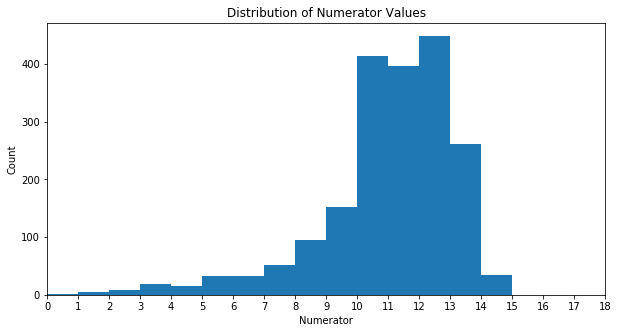

In [81]:
# ploting the distribution of numerator in the dataframe
plt.figure(figsize=(10,5));
numerator = ta_clean.rating.str.extract(r"([0-9.]{0,5})")[0].astype(float)
plt.hist(numerator, bins=np.arange(min(numerator), max(numerator) + 1, 1));
plt.xlim(min(numerator),np.nanpercentile(numerator,99));
plt.xticks(range(0,19));
plt.xlabel('Numerator');
plt.ylabel('Count');
plt.title('Distribution of Numerator Values');
plt.show();

*I can see from the above plot that the most frequent numerator used in the tweets is 12 and the most frequent range is from 
10-13*

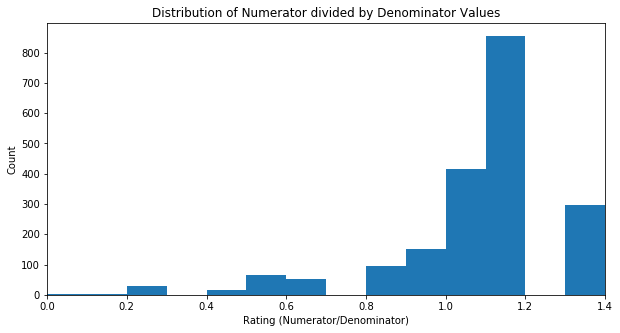

In [82]:
# Ploting the rating numerator/denominator
plt.figure(figsize=(10,5));
rating =  numerator/ta_clean.rating.str.extract(r"/([0-9]{0,5})")[0].astype(float)
plt.hist(rating, bins=np.arange(min(rating), max(rating) + 0.1, 0.1));
plt.xlim(min(rating),np.nanpercentile(rating,99));
plt.xlabel('Rating (Numerator/Denominator)');
plt.ylabel('Count');
plt.title('Distribution of Numerator divided by Denominator Values');
plt.show();

*As stated in the above summary, due to numerator most frequent value is 12 we can see in the above plot that the most frequent
value is 1.2 which is the result of 12/10 (Denominator most frequent value is 10)*

In [83]:
# Subsetting ta dataframe to a smaller DF
analysis_df = ta_clean[['timestamp','favorite_count','retweet_count','stage']]
# Converting analysis.timestamp to pandas timestamp datatype
analysis_df['timestamp'] = pd.to_datetime(analysis_df.timestamp)
# Printing a value in the Series to see its datatype
analysis_df.timestamp[1]
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 4 columns):
timestamp         1987 non-null datetime64[ns, UTC]
favorite_count    1983 non-null float64
retweet_count     1983 non-null float64
stage             325 non-null category
dtypes: category(1), datetime64[ns, UTC](1), float64(2)
memory usage: 48.8 KB


In [84]:
# Converting stage to a category datatype
analysis_df['stage'] = analysis_df.stage.astype('category')

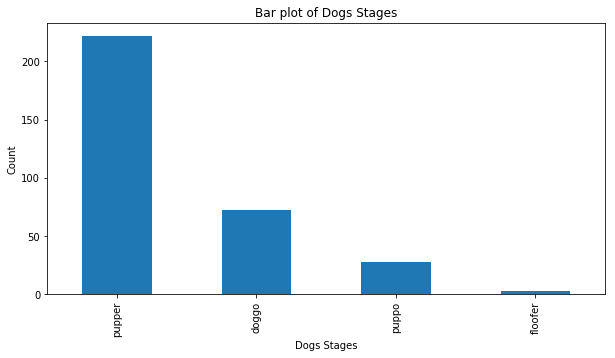

In [85]:
# Plotting dogs stages distribution
plt.figure(figsize=(10,5));
d = analysis_df[~analysis_df.stage.isna()]
d.stage.value_counts().plot.bar();
plt.xlabel('Dogs Stages');
plt.ylabel('Count');
plt.title('Bar plot of Dogs Stages');
plt.show();

*We can tell from the above bar plot that the most frquent dog stage is Pupper*

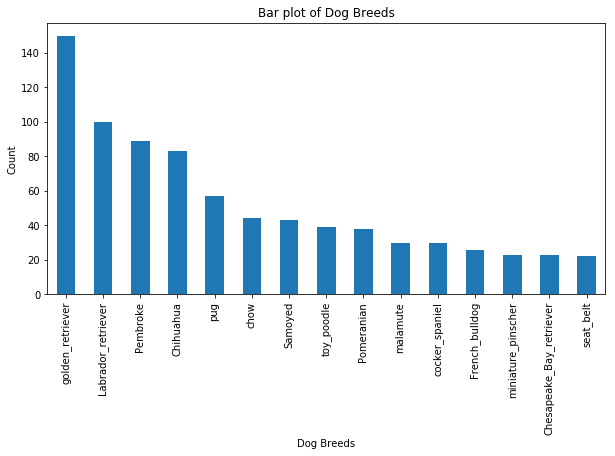

In [86]:
# Plotting dog breeds distribution
plt.figure(figsize=(10,5));
ip_clean.p1.value_counts()[:15].plot(kind='bar');
plt.xlabel('Dog Breeds');
plt.ylabel('Count');
plt.title('Bar plot of Dog Breeds');
plt.show();

*Plotting the image prediction Dataframe and dog prediction we can see from the above bar plot that `golden_retriever` is the most common dog breed*

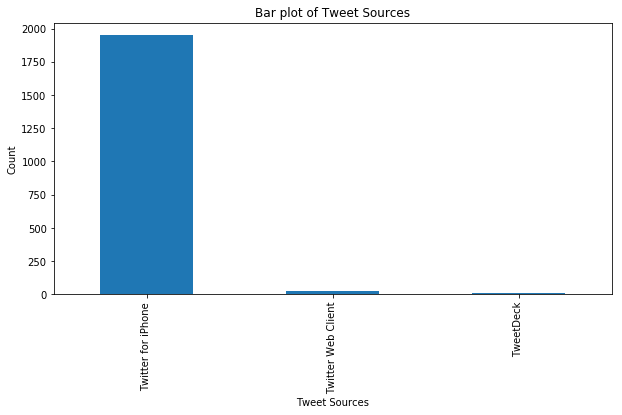

In [87]:
# Plotting tweet sources distribution
plt.figure(figsize=(10,5));
ta_clean.source.value_counts().plot(kind='bar');
plt.xlabel('Tweet Sources');
plt.ylabel('Count');
plt.title('Bar plot of Tweet Sources');
plt.show();

*By Analyzing an plotting the tweet source we can tell iPhone is dominant in here*

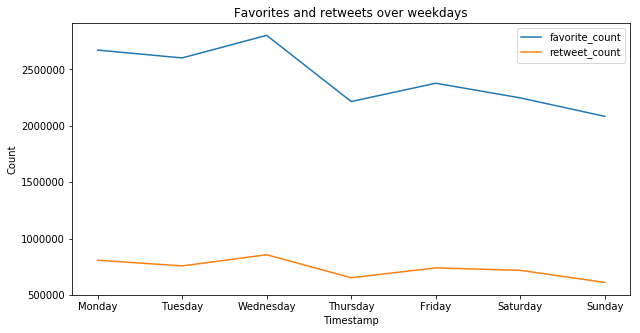

In [88]:
# Groupping by timestamp day of the week and plotting a distribution of favorites and retweets over weekdays
lab = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(10,5));
plt.plot(analysis_df.groupby(analysis_df.timestamp.dt.weekday).sum());
plt.xticks(range(0,7), lab);
plt.xlabel('Timestamp');
plt.ylabel('Count');
plt.title('Favorites and retweets over weekdays');
plt.legend(('favorite_count','retweet_count'));
plt.show();

*Interesting plot, we can see a relation between the Favorites and Retweets, also another observation is that the number of favorites and retweets spikes on Tuesday, and goes down sharply on Staurdays I guess people like to see this account in the working days/hours* 

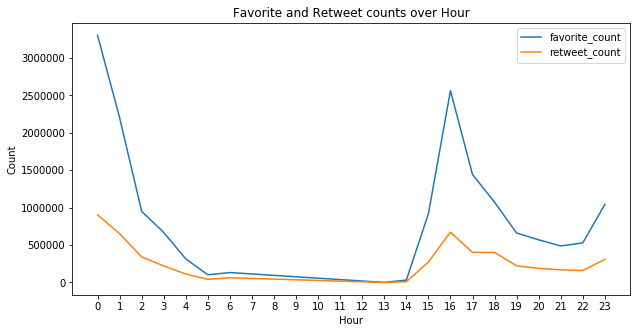

In [89]:
# Groupping by timestamp by the hour and plotting favorite and retweet counts over hour
plt.figure(figsize=(10,5));
plt.plot(analysis_df.groupby(analysis_df.timestamp.dt.hour).sum());
plt.xticks(range(0,24));
plt.xlabel('Hour');
plt.ylabel('Count');
plt.title('Favorite and Retweet counts over Hour');
plt.legend(('favorite_count','retweet_count'));
plt.show();

*Another interesting plot, again the favorites and retweets are highly related, furthermore, favorites counts and retweet counts increases from hour 14 to 18, and reaches the peak at 12am, so I am guessing the reason is after working hours and bed time*

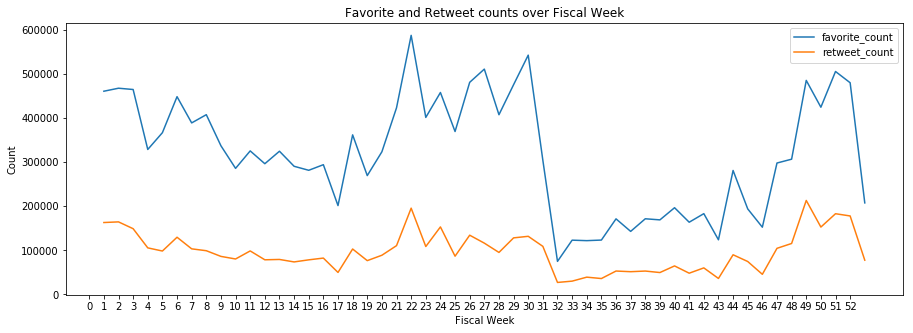

In [90]:
# Groupping by timestamp by the week and plotting favorite and retweet counts over week of the year
plt.figure(figsize=(15,5));
plt.plot(analysis_df.groupby(analysis_df.timestamp.dt.week).sum());
plt.xticks(range(0,53));
plt.xlabel('Fiscal Week');
plt.ylabel('Count');
plt.title('Favorite and Retweet counts over Fiscal Week');
plt.legend(('favorite_count','retweet_count'));
plt.show();

*Timeseries by fiscal week, favorites and retweets peaks on week 22, and drops sharply on week 32, and peaks again between 49-51*

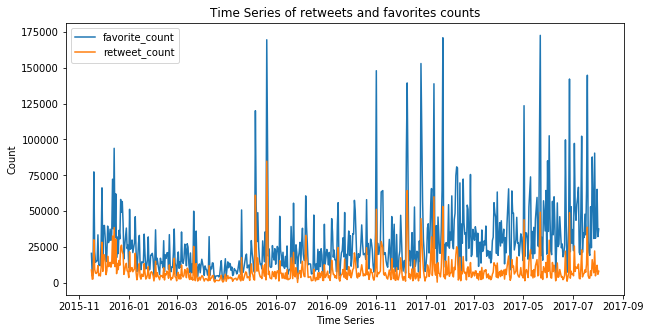

In [91]:
# Flooring the timestamp to 1Hour and then groupby it and plotting the time series
analysis_df.timestamp = analysis_df.timestamp.dt.round('1D')
plt.figure(figsize=(10,5));
plt.plot(analysis_df.groupby(analysis_df.timestamp).sum());
plt.xlabel('Time Series');
plt.ylabel('Count');
plt.title('Time Series of retweets and favorites counts');
plt.legend(('favorite_count','retweet_count'));
plt.show();

*Timeseries of the timestamp floored to 1 day, we can see how much the favorites and retweets are related, also we can see the spikes on different timestamps*

#### References:
https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin
https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
https://stackoverflow.com/questions/44581647/retrieving-a-list-of-tweets-using-tweet-id-in-tweepy/51115753
https://stackoverflow.com/questions/3462143/get-difference-between-two-lists
https://stackoverflow.com/questions/14016247/find-integer-index-of-rows-with-nan-in-pandas-dataframe
https://pandas.pydata.org/pandas-docs/stable/index.html
https://stackoverflow.com/questions/50203857/extract-only-whole-word-that-has-the-first-letter-capitalized
https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe
https://stackoverflow.com/questions/33120584/python-regex-find-string-between-html-tags